**Importing all essential libraries**

In [192]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Loading Dataset**
https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction/data

In [193]:
data1=pd.read_csv("/content/medical_insurance.csv")

In [194]:
data1.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Checking Dataset's null value and Types

In [198]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


Checking any null value

In [199]:
data1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Visualization of numerical variable
"age" and "children" are numerical variable

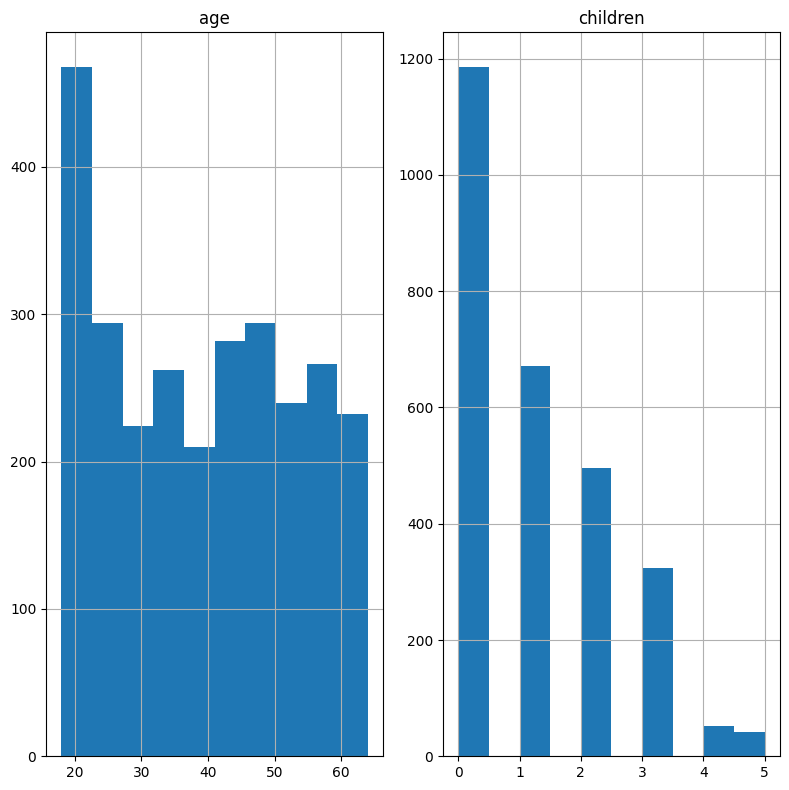

In [200]:
x= data1.select_dtypes(include=['int64'])
x.hist(figsize=(8, 8))
plt.tight_layout()
plt.show()

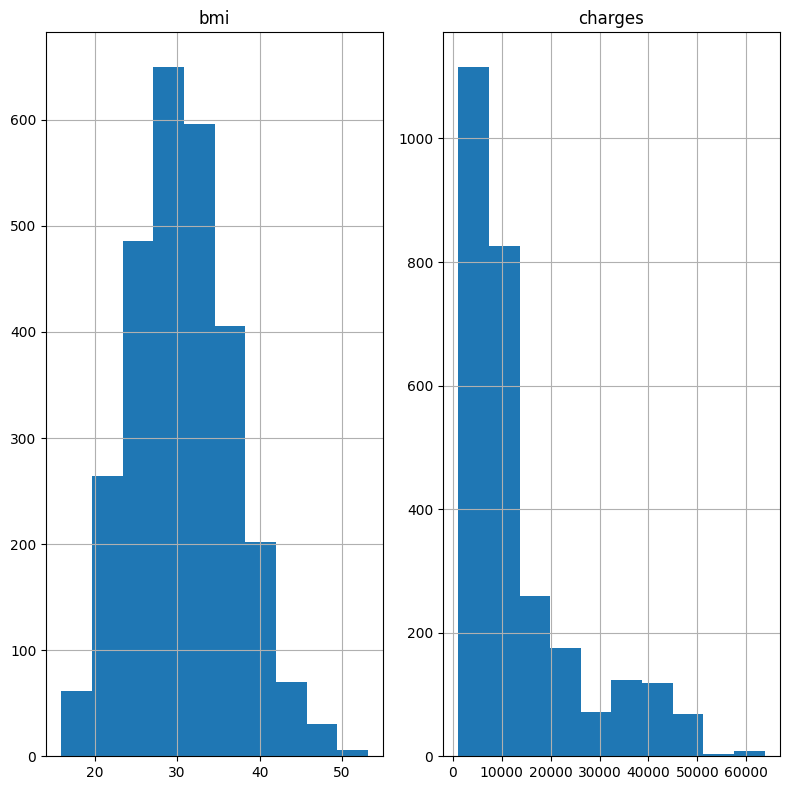

In [201]:
y= data1.select_dtypes(include=['float64'])
y.hist(figsize=(8, 8))
plt.tight_layout()
plt.show()

visualization of categorical variable

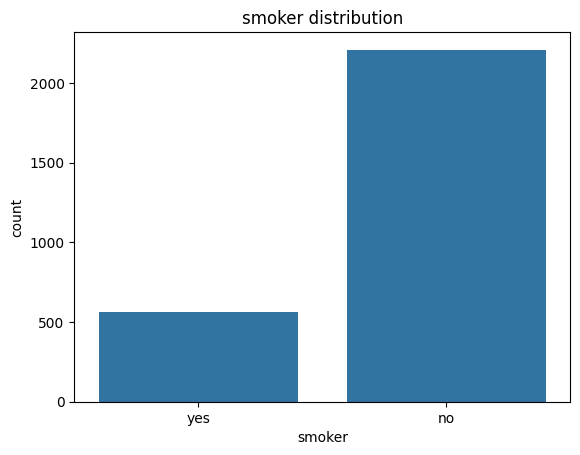

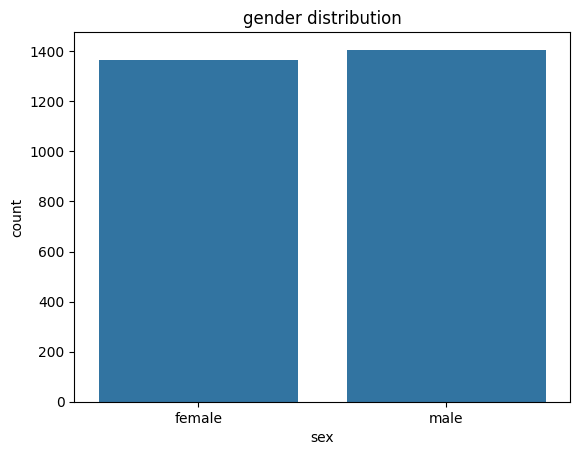

In [202]:
sns.countplot(x="smoker",data=data1)
plt.title("smoker distribution")
plt.show()
sns.countplot(x='sex',data=data1)
plt.title("gender distribution")
plt.show()

Dataset has categorical variable so we have chage this into numerical

In [203]:
sex=data1.sex
x= pd.get_dummies(sex,dtype=int)

In [204]:
x

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
2767,1,0
2768,1,0
2769,0,1
2770,0,1


Joining of column"male" and 'female" with dataset


In [205]:
df=pd.concat([data1,x],axis="columns")

In [206]:
df

,age,sex,bmi,children,smoker,region,charges,female,male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,1,0
2768,21,female,34.600,0,no,southwest,2020.17700,1,0
2769,19,male,26.030,1,yes,northwest,16450.89470,0,1
2770,23,male,18.715,0,no,northwest,21595.38229,0,1


dropping 'sex' variable and dropping female varible to avoid dummy variable trap

In [ ]:
df.drop(["sex","female"],axis=1,inplace=True)

In [213]:
df

,age,bmi,children,smoker,region,charges,male
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...
2767,47,45.320,1,no,southeast,8569.86180,0
2768,21,34.600,0,no,southwest,2020.17700,0
2769,19,26.030,1,yes,northwest,16450.89470,1
2770,23,18.715,0,no,northwest,21595.38229,1


column 'smoker' also has categorical varialbe and we are assigning "yes" as 1 and "no" as 0

In [214]:
from sklearn.preprocessing import OrdinalEncoder

In [215]:
print(df["smoker"].shape)

(2772,)


In [216]:
encoder=OrdinalEncoder(categories=[["no","yes"]])

In [217]:
y=encoder.fit_transform(df[["smoker"]])

In [218]:
y=pd.DataFrame(y)

In [219]:
y

,0
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
2767,0.0
2768,0.0
2769,1.0
2770,0.0


In [220]:
df=pd.concat([df,y],axis="columns")

joining to dataset

In [221]:
df

,age,bmi,children,smoker,region,charges,male,0
0,19,27.900,0,yes,southwest,16884.92400,0,1.0
1,18,33.770,1,no,southeast,1725.55230,1,0.0
2,28,33.000,3,no,southeast,4449.46200,1,0.0
3,33,22.705,0,no,northwest,21984.47061,1,0.0
4,32,28.880,0,no,northwest,3866.85520,1,0.0
...,...,...,...,...,...,...,...,...
2767,47,45.320,1,no,southeast,8569.86180,0,0.0
2768,21,34.600,0,no,southwest,2020.17700,0,0.0
2769,19,26.030,1,yes,northwest,16450.89470,1,1.0
2770,23,18.715,0,no,northwest,21595.38229,1,0.0


renaming column

In [222]:
df.rename(columns={0:"smoker_new"},inplace=True)

In [223]:
df=df.drop(["region","smoker"],axis=1)

In [224]:
df

,age,bmi,children,charges,male,smoker_new
0,19,27.900,0,16884.92400,0,1.0
1,18,33.770,1,1725.55230,1,0.0
2,28,33.000,3,4449.46200,1,0.0
3,33,22.705,0,21984.47061,1,0.0
4,32,28.880,0,3866.85520,1,0.0
...,...,...,...,...,...,...
2767,47,45.320,1,8569.86180,0,0.0
2768,21,34.600,0,2020.17700,0,0.0
2769,19,26.030,1,16450.89470,1,1.0
2770,23,18.715,0,21595.38229,1,0.0


Arrangment of column according to need

In [225]:
df=df[["age","bmi","children","male","smoker_new","charges"]]

In [226]:
df

,age,bmi,children,male,smoker_new,charges
0,19,27.900,0,0,1.0,16884.92400
1,18,33.770,1,1,0.0,1725.55230
2,28,33.000,3,1,0.0,4449.46200
3,33,22.705,0,1,0.0,21984.47061
4,32,28.880,0,1,0.0,3866.85520
...,...,...,...,...,...,...
2767,47,45.320,1,0,0.0,8569.86180
2768,21,34.600,0,0,0.0,2020.17700
2769,19,26.030,1,1,1.0,16450.89470
2770,23,18.715,0,1,0.0,21595.38229


Splitting of dataset into input variable "X" and output varible or target "Y"

In [228]:
X=df.iloc[:,0:5]

In [229]:
X

,age,bmi,children,male,smoker_new
0,19,27.900,0,0,1.0
1,18,33.770,1,1,0.0
2,28,33.000,3,1,0.0
3,33,22.705,0,1,0.0
4,32,28.880,0,1,0.0
...,...,...,...,...,...
2767,47,45.320,1,0,0.0
2768,21,34.600,0,0,0.0
2769,19,26.030,1,1,1.0
2770,23,18.715,0,1,0.0


In [230]:
Y=df.iloc[:,-1]

In [231]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64

Splitting dataset into train test split

In [232]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=30)

In [233]:
X_train

,age,bmi,children,male,smoker_new
1315,18,28.31,1,1,0.0
1197,41,33.55,0,1,0.0
2396,48,22.80,0,0,0.0
706,51,38.06,0,0,1.0
2704,35,39.71,4,1,0.0
...,...,...,...,...,...
919,35,34.21,1,0,0.0
1164,41,28.31,1,0,0.0
500,29,34.40,0,1,1.0
421,61,35.86,0,1,1.0


In [234]:
X_train.shape

(1940, 5)

In [235]:
X_test

,age,bmi,children,male,smoker_new
55,58,36.955,2,1,1.0
17,23,23.845,0,1,0.0
1496,54,33.630,1,1,0.0
202,60,24.035,0,0,0.0
70,27,24.750,0,0,1.0
...,...,...,...,...,...
1749,21,26.400,1,0,0.0
715,60,28.900,0,1,0.0
2579,48,36.575,0,0,0.0
403,49,32.300,3,1,0.0


In [236]:
X_test.shape

(832, 5)

In [237]:
y_train

1315    11272.33139
1197     5699.83750
2396     8269.04400
706     44400.40640
2704    19496.71917
           ...     
919      5245.22690
1164     7153.55390
500     36197.69900
421     46599.10840
1829    28287.89766
Name: charges, Length: 1940, dtype: float64

In [238]:
y_train.shape

(1940,)

In [239]:
y_test

55      47496.49445
17       2395.17155
1496    10825.25370
202     13012.20865
70      16577.77950
           ...     
1749     2597.77900
715     12146.97100
2579     8671.19125
403     10269.46000
959     28468.91901
Name: charges, Length: 832, dtype: float64

In [240]:
y_test.shape

(832,)

Normalization of dataset using MinMaxScaler

In [249]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

Fitting and transforming dataset

In [250]:
scaler.fit(X_train)
x_train_normal=scaler.fit_transform(X_train)
x_test_normal=scaler.fit_transform(X_test)

In [251]:
x_train_normal

array([[0.        , 0.3322572 , 0.2       , 1.        , 0.        ],
       [0.5       , 0.4732311 , 0.        , 1.        , 0.        ],
       [0.65217391, 0.18401937, 0.        , 0.        , 0.        ],
       ...,
       [0.23913043, 0.496099  , 0.        , 1.        , 1.        ],
       [0.93478261, 0.53537799, 0.        , 1.        , 1.        ],
       [0.89130435, 0.55313425, 0.2       , 0.        , 0.        ]])

In [252]:
x_test_normal

array([[0.86956522, 0.56483723, 0.4       , 1.        , 1.        ],
       [0.10869565, 0.21213344, 0.        , 1.        , 0.        ],
       [0.7826087 , 0.47538337, 0.2       , 1.        , 0.        ],
       ...,
       [0.65217391, 0.55461394, 0.        , 0.        , 0.        ],
       [0.67391304, 0.43960183, 0.6       , 1.        , 0.        ],
       [0.65217391, 0.55716976, 0.2       , 1.        , 0.        ]])

In [253]:
x_train_normal.shape,y_train.shape

((1940, 5), (1940,))

**Neural Network Model building **

In [254]:
tf.random.set_seed(30)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(10)
])
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
model.fit(x_train_normal,y_train,epochs=200)

Epoch 1/200
61/61 [==============================] - 1s 3ms/step - loss: 13229.5020 - mae: 13229.5020
Epoch 2/200
61/61 [==============================] - 0s 2ms/step - loss: 13210.1611 - mae: 13210.1611
Epoch 3/200
61/61 [==============================] - 0s 2ms/step - loss: 13123.1230 - mae: 13123.1230
Epoch 4/200
61/61 [==============================] - 0s 2ms/step - loss: 12898.8311 - mae: 12898.8311
Epoch 5/200
61/61 [==============================] - 0s 2ms/step - loss: 12467.5352 - mae: 12467.5352
Epoch 6/200
61/61 [==============================] - 0s 2ms/step - loss: 11771.4648 - mae: 11771.4648
Epoch 7/200
61/61 [==============================] - 0s 2ms/step - loss: 10828.9609 - mae: 10828.9609
Epoch 8/200
61/61 [==============================] - 0s 3ms/step - loss: 9752.4424 - mae: 9752.4424
Epoch 9/200
61/61 [==============================] - 0s 2ms/step - loss: 8711.8750 - mae: 8711.8750
Epoch 10/200
61/61 [==============================] - 0s 2ms/step - loss: 7909.7012 - 

**Model Evaluation**

In [255]:
model.evaluate(x_test_normal,y_test)

26/26 [==============================] - 0s 2ms/step - loss: 2959.3042 - mae: 2959.3042


[2959.30419921875, 2959.30419921875]

Predication of model on test dataset

In [257]:
pred=model.predict(x_test_normal)

26/26 [==============================] - 0s 1ms/step


In [258]:
pred

array([[43199.75  , 43200.355 , 43204.11  , ..., 43201.492 , 43202.246 ,
        43202.242 ],
       [ 1916.3534,  1916.4965,  1916.71  , ...,  1916.4286,  1916.599 ,
         1916.3387],
       [10789.396 , 10789.819 , 10790.608 , ..., 10789.852 , 10790.24  ,
        10789.788 ],
       ...,
       [ 9286.912 ,  9287.105 ,  9287.82  , ...,  9287.358 ,  9287.591 ,
         9287.252 ],
       [10223.621 , 10223.921 , 10224.504 , ..., 10223.905 , 10224.267 ,
        10223.816 ],
       [ 9294.082 ,  9294.37  ,  9295.079 , ...,  9294.415 ,  9294.753 ,
         9294.305 ]], dtype=float32)